In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import colorsys

Starting t-SNE...
t-SNE finished.


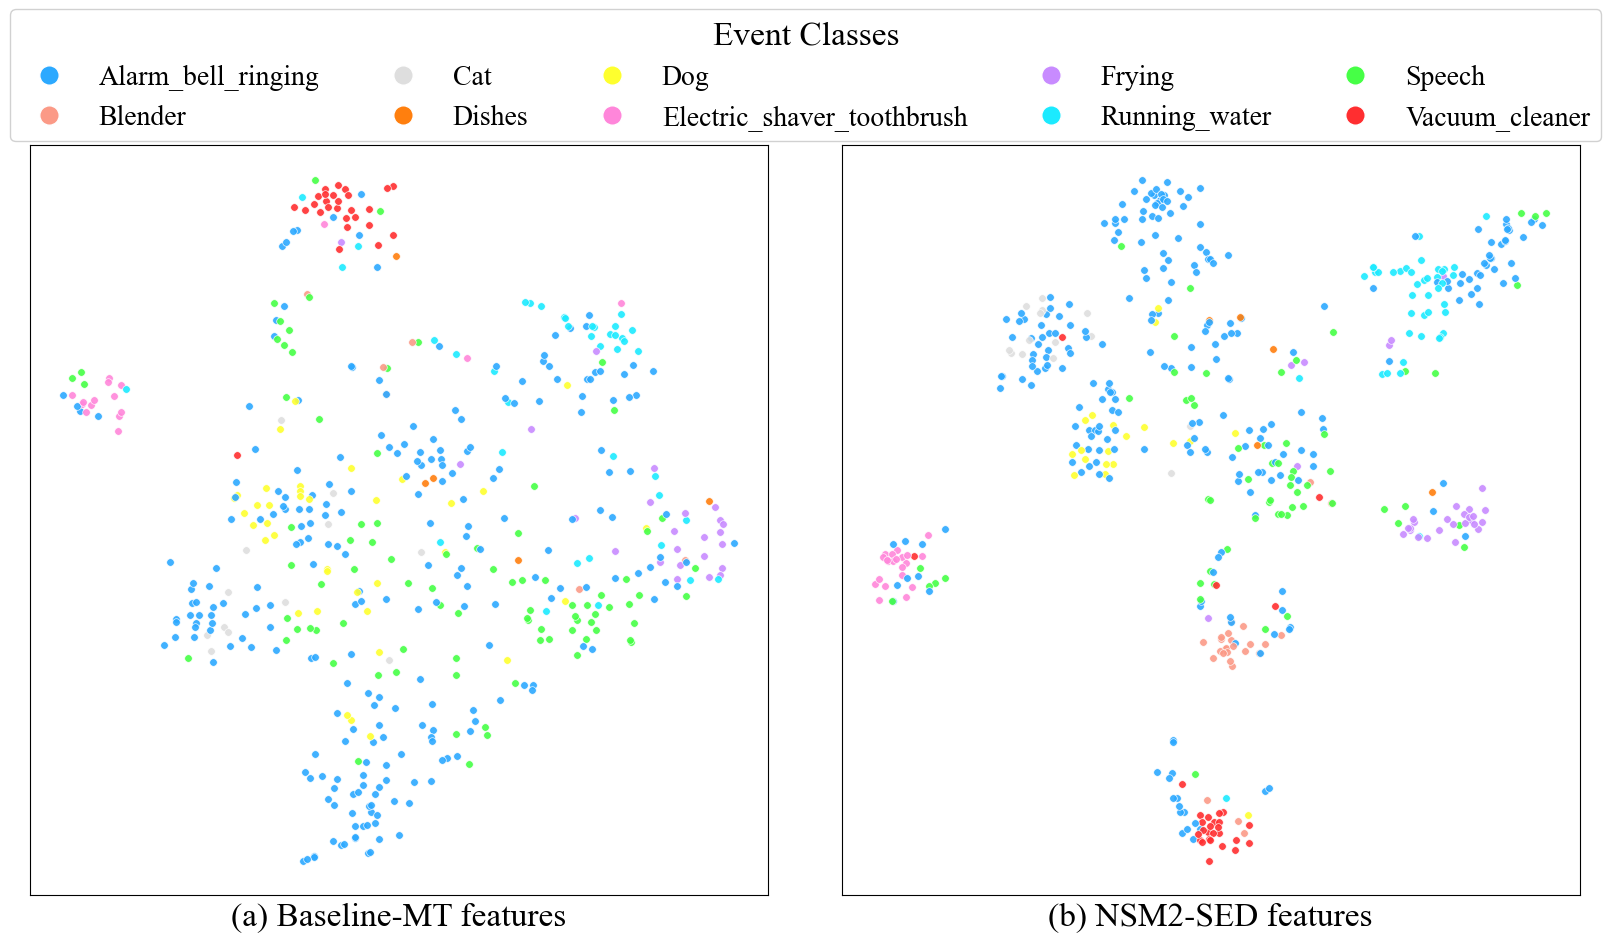

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import colorsys
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

def get_fer_data(data_path, label_path):
    data = np.load(data_path)
    label = np.load(label_path)
    n_samples, n_features = data.shape
    return data, label, n_samples, n_features

# 类别标签
class_labels = ['Alarm_bell_ringing', 'Blender', 'Cat', 'Dishes', 'Dog', 
                'Electric_shaver_toothbrush', 'Frying', 'Running_water', 'Speech', 'Vacuum_cleaner']

# 颜色映射（保证差异明显）
color_map_10 = plt.get_cmap('tab10').colors
color_map = [color_map_10[0], color_map_10[5], color_map_10[7], color_map_10[1], color_map_10[8], color_map_10[6],
             color_map_10[4], color_map_10[9], color_map_10[2], color_map_10[3]]

def adjust_brightness_contrast(color, brightness=1.5, contrast=1.5):
    r, g, b = color
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    v = v * brightness
    v = (v - 0.5) * contrast + 0.5
    v = max(0, min(1, v))
    r, g, b = colorsys.hsv_to_rgb(h, s, v)
    return r, g, b

def plot_embedding_2D(ax, data, label, brightness=1.5, contrast=1.5):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    for i in range(data.shape[0]):
        color = adjust_brightness_contrast(color_map[label[i]], brightness, contrast)
        ax.scatter(data[i, 0], data[i, 1], marker='o', s=30, color=color, alpha=0.9, edgecolors='w', linewidth=0.5)
    ax.set_xticks([])
    ax.set_yticks([])

def main():
    # 数据路径
    crnn_data_path = ".\crnn_data_embed.npy"
    crnn_label_path = ".\crnn_label_embed.npy"
    mamba_data_path = ".\mamba_data_embed.npy"
    mamba_label_path = ".\mamba_label_embed.npy"

    crnn_data, crnn_label, _, _ = get_fer_data(crnn_data_path, crnn_label_path)
    mamba_data, mamba_label, _, _ = get_fer_data(mamba_data_path, mamba_label_path)

    print("Starting t-SNE...")
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    crnn_result = tsne.fit_transform(crnn_data)
    mamba_result = tsne.fit_transform(mamba_data)
    print("t-SNE finished.")

    # 并排子图
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    plot_embedding_2D(axes[0], crnn_result, crnn_label)
    axes[0].set_xlabel('(a) Baseline-MT features', fontsize=24)  # 改成 xlabel
    plot_embedding_2D(axes[1], mamba_result, mamba_label)
    axes[1].set_xlabel('(b) NSM2-SED features', fontsize=24)  # 改成 xlabel

    # 构造 legend handles
    handles = []
    for i, cls in enumerate(class_labels):
        color = adjust_brightness_contrast(color_map[i], brightness=1.5, contrast=1.5)
        handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                                  markersize=14, label=cls))  # 增大 marker size

    # legend 放置上方，宽度覆盖两张图
    fig.legend(handles=handles, loc='upper center', ncol=5, fontsize=20, title='Event Classes',
               title_fontsize=24, frameon=True, framealpha=0.9,
               bbox_to_anchor=(0.513, 1))  # 调整到上方

    plt.subplots_adjust(top=0.85, bottom=0.10, wspace=0.1)  # 给 legend 和 xlabel 留空间
    plt.show()
    fig.savefig("./T-SNE-fig6.pdf", bbox_inches='tight')

if __name__ == '__main__':
    main()
